Link para notebook    
https://colab.research.google.com/drive/1Dh3vCqpgbYyZFqeKDNEniNpxGNIE9fVx#scrollTo=gTIUJWUDSksF

Os dados escolhidos estavam entre as sugestões do professor. 
Como gostaria de aplicar o conhecimentos adquiridos, tentei juntar todos os dados de todos os países com todas as variáveis para criar uma solução robusta, isto é, capaz de diversas análises com pouca modificação. 

In [ ]:
import requests # para importar 
import pandas as pd # trabalhar com dataframe
import seaborn as sns # graficos
import matplotlib.pyplot as plt # graficos
import zipfile # utilizar zipfile
import os # informacoes sobre os arquivos do diretorio.

In [ ]:
# para pratricar o que estou vendo no DataCamp, tentarei imoprtar utilizando a biblioteca requests
# utilizando o f12 no chrome foi possivel achar o link para o arquivo zip com todas as planilhas
url = 'https://wid.world/bulk_download/wid_all_data.zip' 
# realizando o request
r = requests.get(url)  

#download das planilhas
with open ('data.zip', 'wb') as f:   
  f.write(r.content)

# acessando o arquivo zip
with zipfile.ZipFile('data.zip', 'r') as data_zip:  
  #extraidndo todas as listas
  data_zip.extractall('data')                       



In [ ]:
cd data

/content/data


In [ ]:
# !ls 

In [ ]:
# para acessar arquivos com mais facilidade
import glob 

In [ ]:
#gerar uma comprehensive list para gerar uma lista com todos os nomes dos data_sets.
file_extension = '.csv'
all_filenames = [i for i in glob.glob(f'*{file_extension}')]

In [ ]:
print(all_filenames[: 15])

['WID_data_PH.csv', 'WID_data_UY.csv', 'WID_data_TZ.csv', 'WID_data_GE.csv', 'WID_data_SE.csv', 'WID_metadata_DO.csv', 'WID_data_KW.csv', 'WID_data_YE.csv', 'WID_data_KN.csv', 'WID_metadata_US-MO.csv', 'WID_data_QN-MER.csv', 'WID_data_EC.csv', 'WID_data_GR.csv', 'WID_metadata_XI.csv', 'WID_data_SG.csv']


In [ ]:
# separar os arquivos por categoria: metadata, data e o ~resto~
data_files = []
metadata_files = []
desconhecido = []
for i in all_filenames:
  if 'metadata' in i:
    metadata_files.append(i)
  elif 'data' in i:
    data_files.append(i)
  else:
    desconhecido.append(i)


In [ ]:
print(data_files[0:5])
print(metadata_files[0:5])
print(desconhecido[0:5]) # descobrimos que o desconhecido era lista com todos os paises

['WID_data_PH.csv', 'WID_data_UY.csv', 'WID_data_TZ.csv', 'WID_data_GE.csv', 'WID_data_SE.csv']
['WID_metadata_DO.csv', 'WID_metadata_US-MO.csv', 'WID_metadata_XI.csv', 'WID_metadata_OM.csv', 'WID_metadata_HN.csv']
['WID_countries.csv']


In [ ]:
#importar, transformar em data frame, e concatenar os arquivos da lista data_files
df_data = pd.concat([pd.read_csv(file, delimiter = ';') for file in data_files])

In [ ]:
display(df_data.shape)
display(df_data.head())
display(df_data.dtypes)

(30928056, 7)

,country,variable,percentile,year,value,age,pop
0,PH,ahweal992j,p23p24,1995,5548.4,992,j
1,PH,ahweal992j,p23p24,1996,4897.5,992,j
2,PH,ahweal992j,p23p24,1997,4415.9,992,j
3,PH,ahweal992j,p23p24,1998,4987.6,992,j
4,PH,ahweal992j,p23p24,1999,5642.8,992,j


country        object
variable       object
percentile     object
year            int64
value         float64
age             int64
pop            object
dtype: object

In [ ]:
a = pd.read_csv('WID_metadata_AD.csv', delimiter = ';', encoding = 'cp1250').shape
b = pd.read_csv('WID_metadata_AE.csv', delimiter = ';', encoding = 'cp1250').shape
c = pd.read_csv('WID_metadata_AG.csv', delimiter = ';', encoding = 'cp1250').shape
display(a, b, c)

(56, 19)

(266, 19)

(300, 19)

In [ ]:
#importar, transformar em data frame, e concatenar os arquivos da lista metadata_files
df_metadata = pd.concat([pd.read_csv(file, delimiter = ';', encoding = 'cp1250') for file in metadata_files])

In [ ]:
display(df_metadata.head())

,country,variable,age,pop,countryname,shortname,simpledes,technicaldes,shorttype,longtype,shortpop,longpop,shortage,longage,unit,source,method,extrapolation,data_points
0,DO,accmhni992,992,i,the Dominican Republic,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,DOP,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN
1,DO,accmhni999,999,i,the Dominican Republic,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,DOP,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN
2,DO,accmhoi992,992,i,the Dominican Republic,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,DOP,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN
3,DO,accmhoi999,999,i,the Dominican Republic,Consumption of fixed capital attributable to m...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,DOP,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN
4,DO,accshni992,992,i,the Dominican Republic,Consumption of fixed capital attributable to o...,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,DOP,See [URL][URL_LINK]https://wid.world/document/...,WID.world estimations as a proportion of GDP b...,NaN,NaN


In [ ]:
#importar, transformar em data frame, e concatenar os arquivos da lista desconhecido
#seguindo o mesmo padrão dos outros, menos tendo só um arquivo
df_countries = pd.concat([pd.read_csv(file, delimiter = ';') for file in desconhecido])

In [ ]:
display(df_countries.shape)
display(df_countries.head())
display(df_countries.dtypes)

(385, 5)

,alpha2,titlename,shortname,region,region2
0,AM,Armenia,Armenia,Asia,West Asia
1,AN,the Netherlands Antilles,Netherlands Antilles,Americas,Caribbean
2,BT,Bhutan,Bhutan,Asia,South Asia
3,ER,Eritrea,Eritrea,Africa,East Africa
4,ES,Spain,Spain,Europe,Western Europe


alpha2       object
titlename    object
shortname    object
region       object
region2      object
dtype: object

In [ ]:
# no data frame ~countries~ há o nome dos paises e outras informações relavantes para a análise. 
#Para juntar essas informações foi utilizado o merge ~country~ no caso do df_data e ~alpha2~ no caso df_countries)
df_merged = df_data.merge(df_countries, left_on = 'country', right_on = 'alpha2')

In [ ]:
display(df_merged.head())

,country,variable,percentile,year,value,age,pop,alpha2,titlename,shortname,region,region2
0,PH,ahweal992j,p23p24,1995,5548.4,992,j,PH,the Philippines,Philippines,Asia,South-East Asia
1,PH,ahweal992j,p23p24,1996,4897.5,992,j,PH,the Philippines,Philippines,Asia,South-East Asia
2,PH,ahweal992j,p23p24,1997,4415.9,992,j,PH,the Philippines,Philippines,Asia,South-East Asia
3,PH,ahweal992j,p23p24,1998,4987.6,992,j,PH,the Philippines,Philippines,Asia,South-East Asia
4,PH,ahweal992j,p23p24,1999,5642.8,992,j,PH,the Philippines,Philippines,Asia,South-East Asia


In [ ]:
#me certificando que todas as ~variables~ seguem o padrao de 10 dígitos
assert max(df_merged['variable'].str.len()) == 10
assert min(df_merged['variable'].str.len()) == 10

In [ ]:
display(df_metadata['variable'].head())

0    accmhni992
1    accmhni999
2    accmhoi992
3    accmhoi999
4    accshni992
Name: variable, dtype: object

In [ ]:
# as variáveis se repetem entre os países. Para usar o merge (one to many) preciso retirar as duplicatas 
variables = df_metadata[['variable', 'shortname']].drop_duplicates()
variables.head()

,variable,shortname
0,accmhni992,Consumption of fixed capital attributable to m...
1,accmhni999,Consumption of fixed capital attributable to m...
2,accmhoi992,Consumption of fixed capital attributable to m...
3,accmhoi999,Consumption of fixed capital attributable to m...
4,accshni992,Consumption of fixed capital attributable to o...


In [ ]:
# por algum motivo que nao entendo, as variáveis são compostas pela mesmas partes, mas em ordem diferente. para fazer o merge é necessário reordena-las
list = []
for i, j in variables['variable'].items():
  a = '%s%s%s'% (j[0 : 6],j[-3 : ],j[6])
  list.append(a)
#recortei apenas os 15 primeiros para entrar no pdf
list[:15]


['accmhn992i',
 'accmhn999i',
 'accmho992i',
 'accmho999i',
 'accshn992i',
 'accshn999i',
 'accsho992i',
 'accsho999i',
 'acfcco992i',
 'acfcco999i',
 'acfcfc992i',
 'acfcfc999i',
 'acfcgo992i',
 'acfcgo999i',
 'acfchn992i']

In [ ]:
variables['variable'] = list
#recortei apenas os 15 primeiros para entrar no pdf
display(variables[:15])

,variable,shortname
0,accmhn992i,Consumption of fixed capital attributable to m...
1,accmhn999i,Consumption of fixed capital attributable to m...
2,accmho992i,Consumption of fixed capital attributable to m...
3,accmho999i,Consumption of fixed capital attributable to m...
4,accshn992i,Consumption of fixed capital attributable to o...
5,accshn999i,Consumption of fixed capital attributable to o...
6,accsho992i,Consumption of fixed capital attributable to o...
7,accsho999i,Consumption of fixed capital attributable to o...
8,acfcco992i,Consumption of fixed capital of corporations
9,acfcco999i,Consumption of fixed capital of corporations


In [ ]:
# com o resultado acima percebi que muitos valores se repetem no ~shortname~
variables = variables.drop_duplicates(subset = ['shortname', 'variable'])

In [ ]:
# o merge nao estava funcionando, ao excluir o problema foi rsolvido.
variables['shortname'] = variables['shortname'].str.strip()

In [ ]:
#recortei apenas os 20 primeiros para entrar no pdf
display(variables['shortname'].unique()[:20])

array(['Consumption of fixed capital attributable to mixed income',
       'Consumption of fixed capital attributable to operating surplus',
       'Consumption of fixed capital of corporations',
       'Consumption of fixed capital of financial coporations',
       'Consumption of fixed capital of the general goverment',
       'Consumption of fixed capital of households and NPISH',
       'Consumption of fixed capital of households',
       'Consumption of fixed capital of non-financial coporations',
       'Consumption of fixed capital of NPISH',
       'Collective consumption expenditure', 'Compensation of employees',
       'Compensation of employees of households',
       'Compensation of employees of NPISH', 'Net foreign labor income',
       'Compensation of employees paid from the rest of the world',
       'Compensation of employees received from the rest of the world',
       'Consumption of fixed capital', 'Final consumption expenditures',
       'Private expenditures of ho

In [ ]:
# O dataframe com todos as variáveis fica muito grande e enviável de utilizar no colab. 
# Foram escolhidos assuntos de interesse para analisar
interesse = ['Education',
             'Health', 
             'Social protection', 	
             'Population', 	
             'Defense', 
             'National CO2 footprint',
             'Interest', 
             'Total tax population', 	
             'Personal natural capital',
             'National agricultural land',
             'National natural capital',
             'Government bonds & loans'
             ] 

In [ ]:
#filtrar o data frame variables para ter apenas o de interesse. se não ultrapassa o limita de memoria RAM do colab
variables = variables[variables['shortname'].isin(interesse)]

In [ ]:
display(variables[:20])

,variable,shortname
46,aedugo992i,Education
47,aedugo999i,Education
100,aheago992i,Health
101,aheago999i,Health
266,asopgo992i,Social protection
267,asopgo999i,Social protection
341,enfcar999i,National CO2 footprint
371,knfcar999i,National CO2 footprint
411,medugo999i,Education
438,mheago999i,Health


In [ ]:
# merge dos data frames df_merged e variables utilizando o variable como key
df_total = df_merged.merge(variables, on = 'variable')

In [ ]:
#analise exploratória dos dados
display(df_total.shape)
display(df_total.head())
display(df_total.dtypes)
display(df_total.isna().sum())
display(df_total['shortname_y'].unique())

(2350542, 13)

,country,variable,percentile,year,value,age,pop,alpha2,titlename,shortname_x,region,region2,shortname_y
0,PH,npopul651m,p0p100,1950,107417.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
1,PH,npopul651m,p0p100,1951,108695.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
2,PH,npopul651m,p0p100,1952,110059.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
3,PH,npopul651m,p0p100,1953,111997.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
4,PH,npopul651m,p0p100,1954,114595.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population


country         object
variable        object
percentile      object
year             int64
value          float64
age              int64
pop             object
alpha2          object
titlename       object
shortname_x     object
region          object
region2         object
shortname_y     object
dtype: object

country          8198
variable            0
percentile          0
year                0
value               0
age                 0
pop                 0
alpha2           8198
titlename           0
shortname_x         0
region         660938
region2        660938
shortname_y         0
dtype: int64

array(['Population', 'National CO2 footprint', 'Total tax population',
       'Health', 'Social protection', 'Defense', 'Education',
       'National agricultural land', 'Interest',
       'Government bonds & loans', 'Personal natural capital',
       'National natural capital'], dtype=object)

In [ ]:
df_total[df_total['country'].isna()].head()
df_total[df_total['country'].isna()]['titlename'].value_counts() 

Namibia    8198
Name: titlename, dtype: int64

In [ ]:
#como podemos ver, todos os valores sao referentes a namibia, provavelmente por causa da semenlanca entre NA e NaN
df_total.loc[df_total['country'].isna(), 'country'] = 'NA'

In [ ]:
df_total[df_total['alpha2'].isna()].head()
df_total[df_total['alpha2'].isna()].value_counts('titlename')

titlename
Namibia    8198
dtype: int64

In [ ]:
#como pude ver, todos os valores sao referentes a namibia, provavelmente por causa da semenlanca entre NA e NaN( agora para a variavel 'alpha2')
df_total.loc[df_total['alpha2'].isna(), 'alpha2'] = 'NA'

In [ ]:
#visando entender o resto dos NaN
display(df_total[df_total['region'].isna()].head())
df_total[df_total['region'].isna()]['country'].value_counts()

,country,variable,percentile,year,value,age,pop,alpha2,titlename,shortname_x,region,region2,shortname_y
504,QN-MER,npopul651m,p0p100,1950,177782.0,651,m,QN-MER,Middle Africa (at market exchange rate),Middle Africa (at market exchange rate),NaN,NaN,Population
505,QN-MER,npopul651m,p0p100,1951,178158.0,651,m,QN-MER,Middle Africa (at market exchange rate),Middle Africa (at market exchange rate),NaN,NaN,Population
506,QN-MER,npopul651m,p0p100,1952,179057.0,651,m,QN-MER,Middle Africa (at market exchange rate),Middle Africa (at market exchange rate),NaN,NaN,Population
507,QN-MER,npopul651m,p0p100,1953,180811.0,651,m,QN-MER,Middle Africa (at market exchange rate),Middle Africa (at market exchange rate),NaN,NaN,Population
508,QN-MER,npopul651m,p0p100,1954,183829.0,651,m,QN-MER,Middle Africa (at market exchange rate),Middle Africa (at market exchange rate),NaN,NaN,Population


QD       8226
WO       8226
QL       8226
XA       8226
QH       8198
         ... 
US-IL     102
US-ID     102
US-AK      72
CN-UR      38
CN-RU      38
Name: country, Length: 135, dtype: int64

In [ ]:
#Percebi que os estados dos EUA estavam separados.
df_total[df_total['region2'].isna()]
df_total[df_total['region2'].isna() & (df_total['country'].str.contains('US'))]['titlename'].value_counts()

Michigan                102
Wisconsin               102
Connecticut             102
California              102
Georgia                 102
New Mexico              102
Missouri                102
Montana                 102
Ohio                    102
South Carolina          102
Tennessee               102
Hawaii                  102
Delaware                102
Kansas                  102
New Jersey              102
Colorado                102
Minnesota               102
Louisiana               102
Nevada                  102
North Carolina          102
District of Columbia    102
Massachusetts           102
Washington              102
Maine                   102
Oregon                  102
Utah                    102
Maryland                102
Virginia                102
North Dakota            102
West Virginia           102
Arizona                 102
New York                102
Florida                 102
Rhode Island            102
New Hampshire           102
Oklahoma            

In [ ]:
#visando juntar todos os estados dos EUA em um unico pais, substitui as variaveis ,country, region, titlename e region2
df_total.loc[df_total['region2'].isna() & df_total['country'].str.contains('US'), 'country'] = 'US'

In [ ]:
df_total.loc[df_total['region2'].isna() & df_total['country'].str.contains('US'), 'region'] = 'Americas'

In [ ]:
df_total.loc[df_total['region2'].isna() & df_total['country'].str.contains('US'), 'titlename'] = 'United States'

In [ ]:
df_total.loc[df_total['region2'].isna() & df_total['country'].str.contains('US'), 'region2'] = 'North America'

In [ ]:
df_total.isna().sum()

country             0
variable            0
percentile          0
year                0
value               0
age                 0
pop                 0
alpha2              0
titlename           0
shortname_x         0
region         655766
region2        655766
shortname_y         0
dtype: int64

In [ ]:
#restando apenas siglas para casos específicos. 
na = df_total[df_total['region'].isna()]
na['alpha2'].unique()

array(['QN-MER', 'QI', 'OJ-MER', 'XM-MER', 'QC-MER', 'XM', 'XF-MER', 'QX',
       'QL', 'QE-MER', 'QP', 'QS-MER', 'OE', 'OD', 'QY-MER', 'XB-MER',
       'QQ-MER', 'QK-MER', 'QB-MER', 'WO', 'QK', 'QM-MER', 'QY', 'XN',
       'QJ-MER', 'XA-MER', 'OH-MER', 'OA', 'WO-MER', 'QD-MER', 'QW', 'QV',
       'QU-MER', 'QI-MER', 'QL-MER', 'QU', 'OE-MER', 'QG-MER', 'QO-MER',
       'QT-MER', 'QP-MER', 'OI-MER', 'QQ', 'QB', 'QX-MER', 'XS-MER', 'OH',
       'OI', 'QF-MER', 'QV-MER', 'OJ', 'QR-MER', 'QR', 'XS', 'XL', 'OB',
       'QO', 'QN', 'QM', 'QD', 'XF', 'QE', 'XR', 'XN-MER', 'QJ', 'QF',
       'OA-MER', 'QH', 'OB-MER', 'OC', 'QC', 'XL-MER', 'QW-MER', 'OC-MER',
       'OD-MER', 'XA', 'QS', 'QT', 'XB', 'QG', 'XR-MER', 'QH-MER',
       'CN-RU', 'CN-UR'], dtype=object)

In [ ]:
#como não se encaixam em nenhum país, foram descartadas
df_total = df_total.dropna()

Nas análises serão considerados apenas os últimos 22 anos de dados.

In [ ]:
#Filtando o df_total
# manter apenas os ultimos 22 anos
df_total_01 = df_total[df_total['year']>=2000]
display(df_total_01.head())
display(df_total_01.shape)
display(df_total_01.isna().sum())

,country,variable,percentile,year,value,age,pop,alpha2,titlename,shortname_x,region,region2,shortname_y
50,PH,npopul651m,p0p100,2000,494357.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
51,PH,npopul651m,p0p100,2001,509334.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
52,PH,npopul651m,p0p100,2002,520934.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
53,PH,npopul651m,p0p100,2003,531462.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population
54,PH,npopul651m,p0p100,2004,543992.0,651,m,PH,the Philippines,Philippines,Asia,South-East Asia,Population


(528794, 13)

country        0
variable       0
percentile     0
year           0
value          0
age            0
pop            0
alpha2         0
titlename      0
shortname_x    0
region         0
region2        0
shortname_y    0
dtype: int64

#### 1° Pergunta
Quais são os 10 paises mais populosos do mundo?

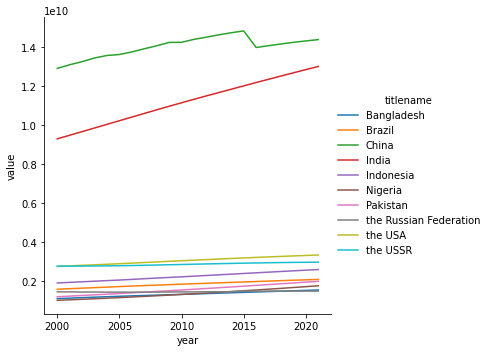

In [ ]:
pop = df_total_01[df_total_01['shortname_y'] == 'Population'].groupby('titlename', as_index = False)['value'].sum()
pop_country = pop.nlargest(10, 'value')
pop_year = df_total_01[df_total_01['shortname_y'] == 'Population'].groupby(['titlename', 'year'], as_index = False)['value'].sum()
pop_sns = pop_year[pop_year['titlename'].isin(pop_country['titlename'])]
sns.relplot(data = pop_sns,
            x = 'year',
            y = 'value',
            kind = 'line',
            hue = 'titlename')

Os dados mostram que os 10 paises mais populosos são: China, India, the USA, the USSR, Indonesia, Brazil, Pakistan, the Russian Federation, Nigeria, Bangladesh. 
No entato, em 1991 houve a dissolu;'ao da Uniao Sovietica (URSS). Não era nem para estar presente nos dados porque filtrei apenas os dados a partir de 2000.

#### 2° Pergunta
Quais paises, dentre os 10 mais populosos, tiveram a maior variação populacional?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

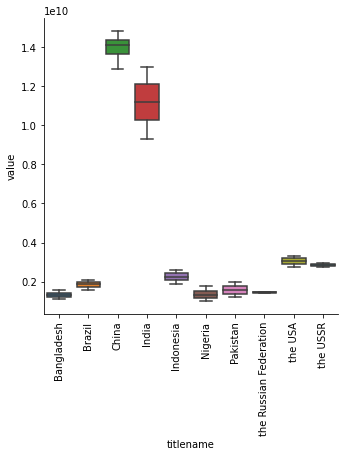

In [ ]:
sns.catplot(data = pop_year[pop_year['titlename'].isin(pop_country['titlename'])],
            x = 'titlename',
            y = 'value',
            kind = 'box')
plt.xticks(rotation = 90)

Usando o boxplot podemos notar que a maiores variações foram na população da China e da India.

#### 3° Pergunta
Quais sao os 10 paises com maior pegada nacional de CO2 nos ultimos 22 anos?


(array([1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. ,
        2017.5, 2020. , 2022.5]), <a list of 11 Text major ticklabel objects>)

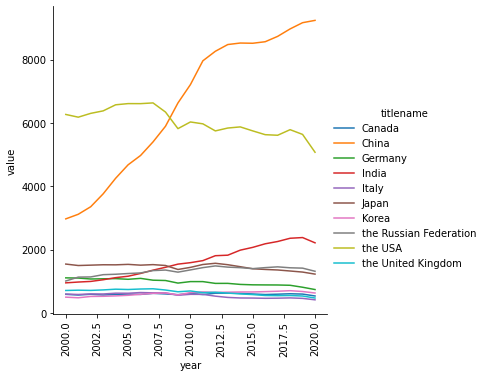

In [ ]:
co2 = df_total_01[df_total_01['shortname_y'] == 'National CO2 footprint'].groupby('titlename', as_index = False)['value'].sum()
co2_country = co2.nlargest(10, 'value')
co2_year = df_total_01[df_total_01['shortname_y'] == 'National CO2 footprint'].groupby(['titlename', 'year'], as_index = False)['value'].sum()
co2_sns = co2_year[co2_year['titlename'].isin(co2_country['titlename'])]
sns.relplot(data = co2_sns,
            x = 'year',
            y = 'value',
            kind = 'line',
            hue = 'titlename')
plt.xticks(rotation = 90)

As maiores pegadas de CO2 são dos seguintes países: Canada, China, Germany, India, Italy, Japan, Korea, Russia, USA, Reino Unido.
Alem disso eh possível perceber a tendencia decrescente da pegada americana e a crescente pegada chinesa e indiana.

#### 4° Pergunta
Quais países tem a maior variação de pegada ecológica?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

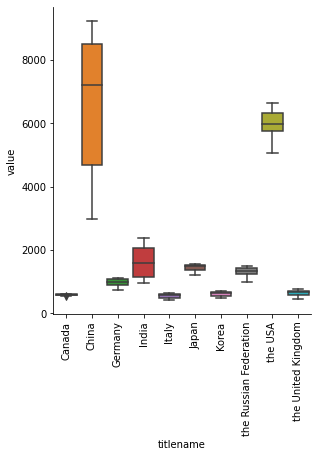

In [ ]:
sns.catplot(data = co2_year[co2_year['titlename'].isin(co2_country['titlename'])],
            x = 'titlename',
            y = 'value',
            kind = 'box')
plt.xticks(rotation = 90)

Os países com maior variação são China, India e USA.

#### 5° Pergunta
Quais países possuem a maiores terras agrícolas nacionais?

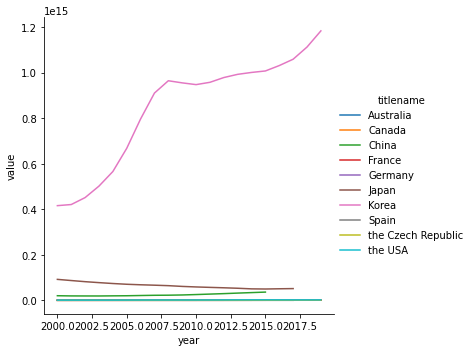

In [ ]:
land = df_total_01[df_total_01['shortname_y'] == 'National agricultural land'].groupby('titlename', as_index = False)['value'].sum()
land_country = land.nlargest(10, 'value')
land_year = df_total_01[df_total_01['shortname_y'] == 'National agricultural land'].groupby(['titlename', 'year'], as_index = False)['value'].sum()
land_sns = land_year[land_year['titlename'].isin(land_country['titlename'])]
sns.relplot(data = land_sns,
            x = 'year',
            y = 'value',
            kind = 'line',
            hue = 'titlename')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

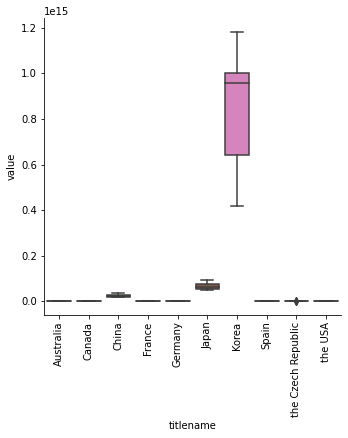

In [ ]:
sns.catplot(data = land_year[land_year['titlename'].isin(land_country['titlename'])],
            x = 'titlename',
            y = 'value',
            kind = 'box')
plt.xticks(rotation = 90)

Os dados indicam que a Korea é o país com maior terra agrícola nacional, o que não condiz com a realidade

In [ ]:
# tentarei usar pivot table para entender o resultado acima
pivot_total = df_total_01.pivot_table(values = 'value', index = ['year','titlename','region'], columns = ['shortname_y'], aggfunc = sum)
display(pivot_total.isna().sum())
pivot_total.head()


shortname_y
Defense                       3908
Education                     3607
Government bonds & loans      4894
Health                        3604
Interest                      5099
National CO2 footprint        1355
National agricultural land    4836
National natural capital      4964
Personal natural capital      5022
Population                       0
Social protection             3657
Total tax population          4903
dtype: int64

shortname_y                  Defense   Education  Government bonds & loans  \
year titlename      region                                                   
2000 Afghanistan    Asia         NaN         NaN                       NaN   
     Albania        Europe       NaN         NaN                       NaN   
     Algeria        Africa       NaN         NaN                       NaN   
     American Samoa Oceania      NaN         NaN                       NaN   
     Andorra        Europe       NaN  37735789.1                       NaN   

shortname_y                     Health  Interest  National CO2 footprint  \
year titlename      region                                                 
2000 Afghanistan    Asia           NaN       NaN                2.020572   
     Albania        Europe         NaN       NaN                5.020231   
     Algeria        Africa         NaN       NaN               47.628865   
     American Samoa Oceania        NaN       NaN                     NaN   
     Andorra        Europe   8020581.7       NaN                     NaN   

shortname_y                  National agricultural land  \
year titlename      region                                
2000 Afghanistan    Asia                            NaN   
     Albania        Europe                          NaN   
     Algeria        Africa                          NaN   
     American Samoa Oceania                         NaN   
     Andorra        Europe                          NaN   

shortname_y                  National natural capital  \
year titlename      region                              
2000 Afghanistan    Asia                          NaN   
     Albania        Europe                        NaN   
     Algeria        Africa                        NaN   
     American Samoa Oceania                       NaN   
     Andorra        Europe                        NaN   

shortname_y                  Personal natural capital   Population  \
year titlename      region                                           
2000 Afghanistan    Asia                          NaN  167385727.0   
     Albania        Europe                        NaN   28519151.0   
     Algeria        Africa                        NaN  271066567.0   
     American Samoa Oceania                       NaN      57821.0   
     Andorra        Europe                        NaN      65390.0   

shortname_y                  Social protection  Total tax population  
year titlename      region                                            
2000 Afghanistan    Asia                   NaN                   NaN  
     Albania        Europe                 NaN                   NaN  
     Algeria        Africa                 NaN                   NaN  
     American Samoa Oceania                NaN                   NaN  
     Andorra        Europe           5425950.0                   NaN

nao há a mesma quantidade de dados coletados em todos países, dificultando a comparacão de variáveis como: ***National agricultural land***, Education, Defense, Governmet bonds & loans, Health dentre outos.   
